##  CarreFour Kenya Sale Increment Strategies.
### 1. Research Question

Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).This project is aimed at doing analysis on the dataset provided by carrefour and create insights on how to achieve highest sales. 


### 2. Metric of Success

Achieving a set of variables that are important and influences the sales variable.

### 3. Understanding the context.

CarreFour is an International chain of retail supemarkets in the world, It was set up in Kenya in the year 2016 and has been performing well over the years.
This project is aimed at creating insights from existing and current trends to develop marketing strategies that will enable the marketing team achieve higher sales.

### 4. Recording the Experimental Design

a. Data Loading
b. Data Cleaning and preprocessing
c. Exploratory Data Analysis
d. Implementation o solution.
e. Recommendations and Conclusions.

### 5. Data Relevance.

The provided data is relevant for this study since it's been sourced from CarreFour database and is a reflection of current transactions.


### Data Preview

#### Loading the libraries

In [ ]:
install.packages('data.table')
install.packages('tidyverse')
install.packages("dplyr")
install.packages("modelr")
install.packages("broom")
install.packages("caret")
install.packages("rpart")
install.packages("ggplot2")
install.packages("Amelia")
library(modelr)
library(broom)
library(caret)
library(rpart)
library(ggplot2)
library(Amelia)
library(dplyr)
library(data.table)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(a

In [ ]:
carrefour <- fread('http://bit.ly/CarreFourDataset')
head(carrefour, 6)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
tail(carrefour, 6)

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
652-49-6720,C,Member,Female,Electronic accessories,60.95,1,3.0475,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9,63.9975
233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


In [ ]:
str(carrefour)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ Invoice ID             : chr  "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" ...
 $ Branch                 : chr  "A" "C" "A" "A" ...
 $ Customer type          : chr  "Member" "Normal" "Normal" "Member" ...
 $ Gender                 : chr  "Female" "Female" "Male" "Male" ...
 $ Product line           : chr  "Health and beauty" "Electronic accessories" "Home and lifestyle" "Health and beauty" ...
 $ Unit price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Time                   : chr  "13:08" "10:29" "13:23" "20:33" ...
 $ Payment                : chr  "Ewallet" "Cash" "Credit card" "Ewallet" ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross margin percentage: num  4.76 4.7

In [ ]:
# checking the size/shape of a dataframe 

dim(carrefour)

[1] 1000   16

### Data Preprocessing.

#### i. Completeness

In [ ]:
# This is achieved by checking for missing values if any imputed to ensure correct predictions are made.

is.null(carrefour)

[1] FALSE

In [ ]:
# Total number of null valuesin dataset
total_null <- sum(is.na(carrefour))
total_null

[1] 0

#### ii. Consistency.
Consistency is achieved when all the duplicated rows are done away with.


In [ ]:

duplicated_rows <- carrefour[duplicated(carrefour), ]
duplicated_rows

Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [ ]:
anyDuplicated(carrefour)

[1] 0

#### iii. Relevance.

Relevance is achieved by ensuring all the features provided for the analysis are relevant to the objective Which in this case all provided features are.

#### iv. Accuracy.

Checking that all entries are correct.

#### Outliers
We can visualize any outliers in a dataset using boxplots


In [ ]:

colnames(carrefour)

[1] "Invoice ID"              "Branch"                 
 [3] "Customer type"           "Gender"                 
 [5] "Product line"            "Unit price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross margin percentage" "gross income"           
[15] "Rating"                  "Total"

In [ ]:
# Rename column where names 
names(carrefour)[names(carrefour) == "Invoice ID"] <- "Invoice_ID"
names(carrefour)[names(carrefour) == "Customer type"] <- "Customer_type"
names(carrefour)[names(carrefour) == "Product line"] <- "Product_line"
names(carrefour)[names(carrefour) == "gross margin percentage"] <- "gross_margin_percentage"
names(carrefour)[names(carrefour) == "Unit price"] <- "Unit_price"
names(carrefour)[names(carrefour) == "gross income"] <- "gross_income"
colnames(carrefour)

[1] "Invoice_ID"              "Branch"                 
 [3] "Customer_type"           "Gender"                 
 [5] "Product_line"            "Unit_price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross_margin_percentage" "gross_income"           
[15] "Rating"                  "Total"

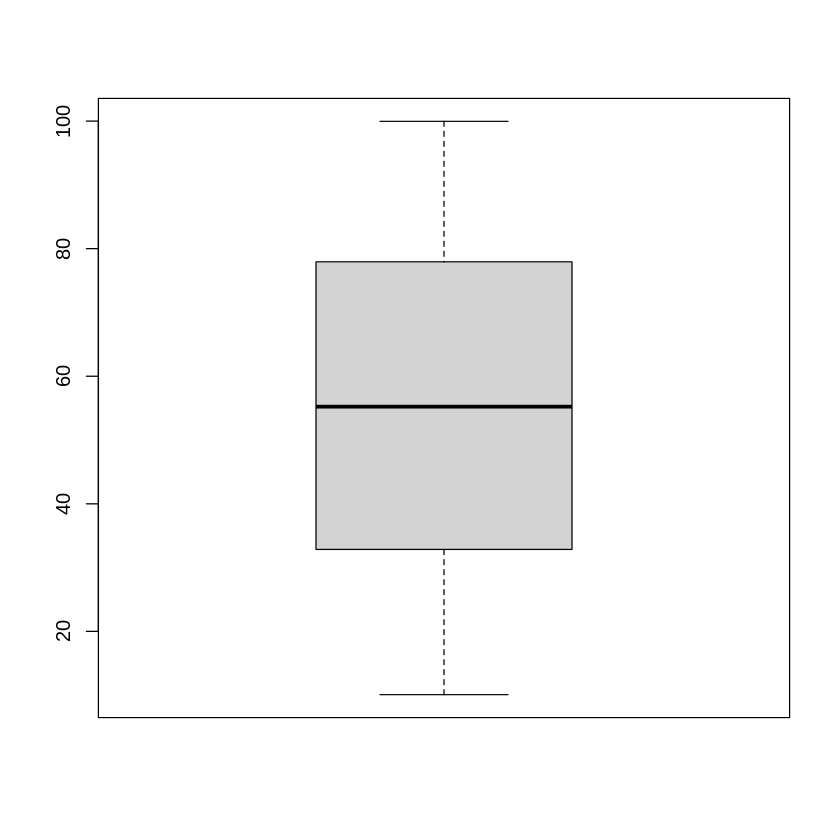

In [ ]:
# a. Unit Price.

a <- carrefour$Unit_price
boxplot(a)

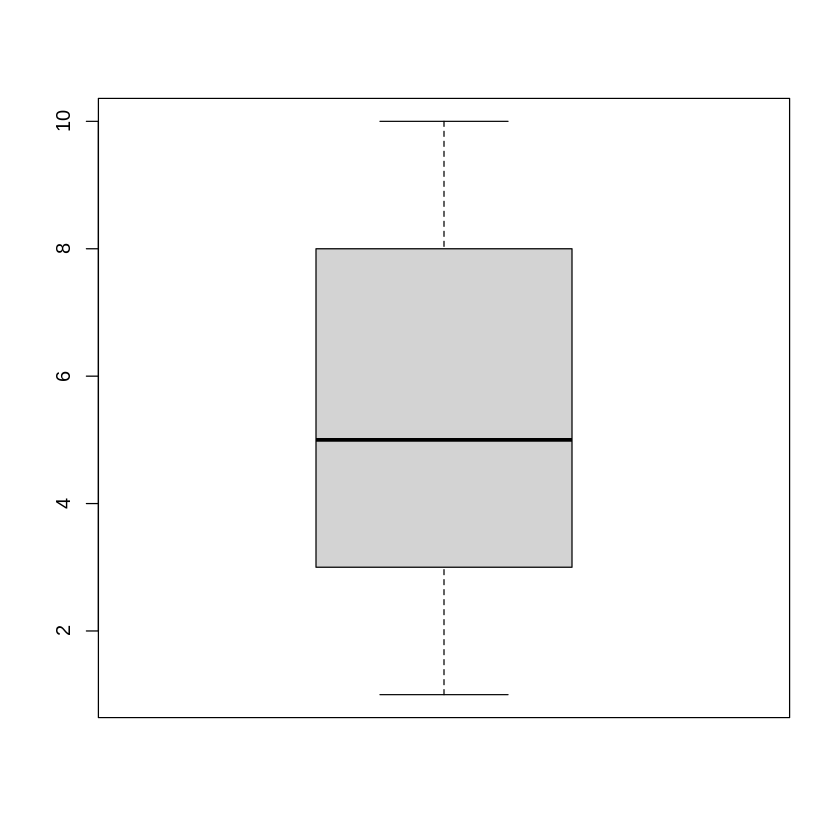

In [ ]:
# b.Quantity

quantity <- carrefour$Quantity
boxplot(quantity)

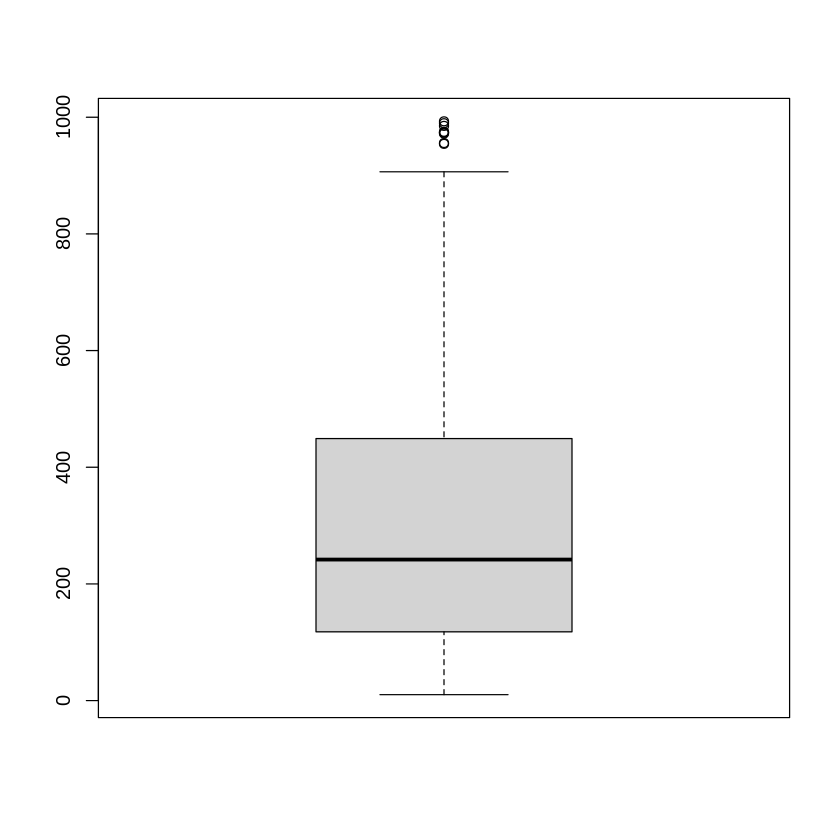

In [ ]:
# c. cogs

cogs <- carrefour$cogs
boxplot(cogs)

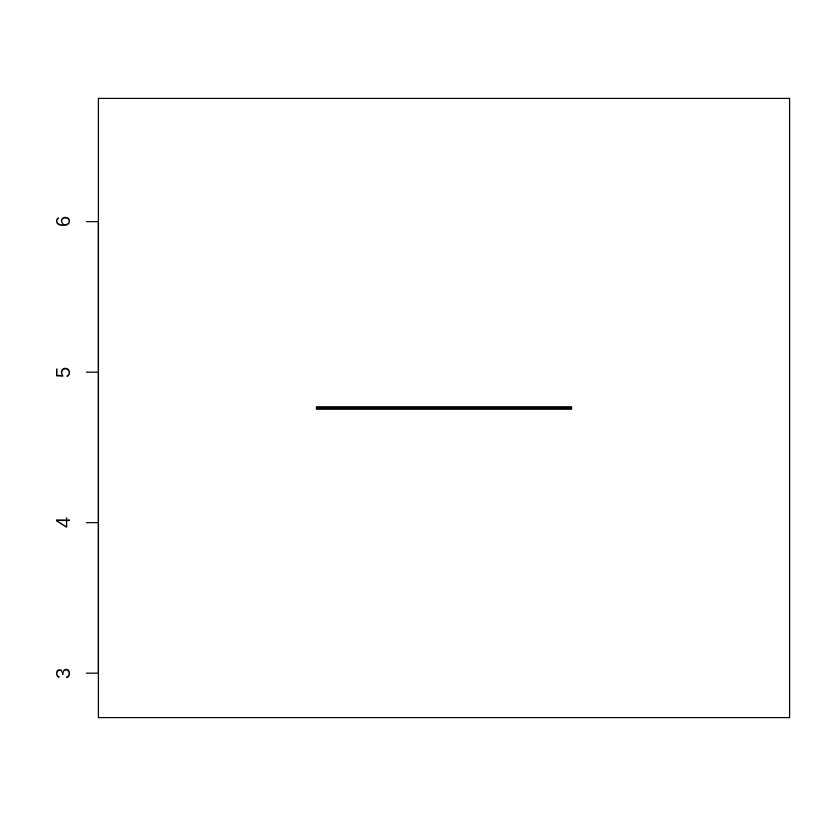

In [ ]:
# d. Gross margin percentage

b <- carrefour$gross_margin_percentage
boxplot(b)

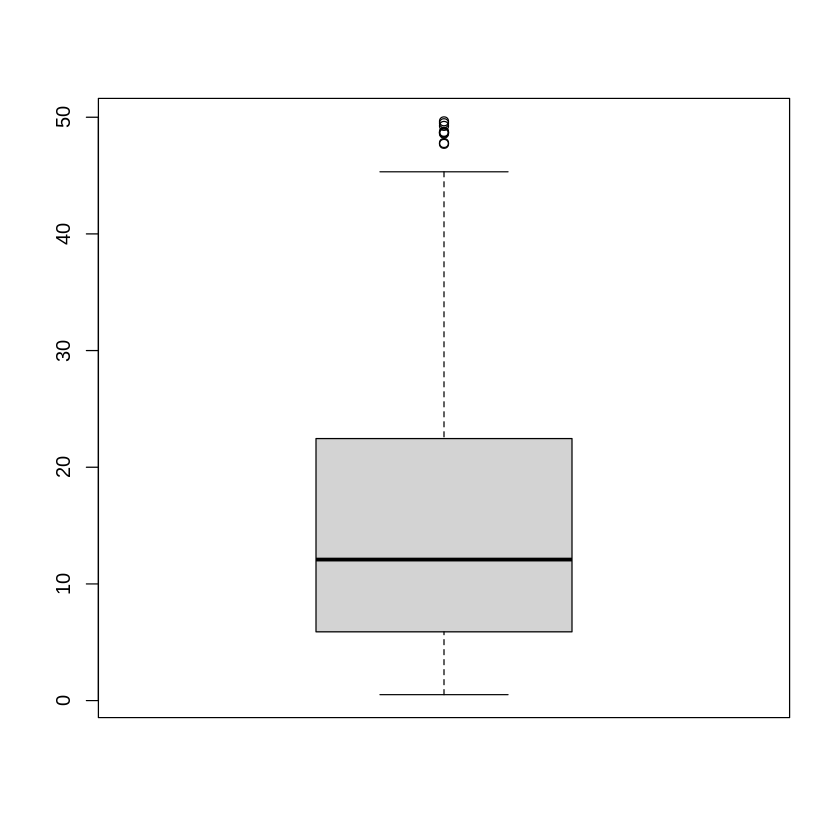

In [ ]:
# e. Gross income

gross_income <- carrefour$gross_income
boxplot(gross_income)

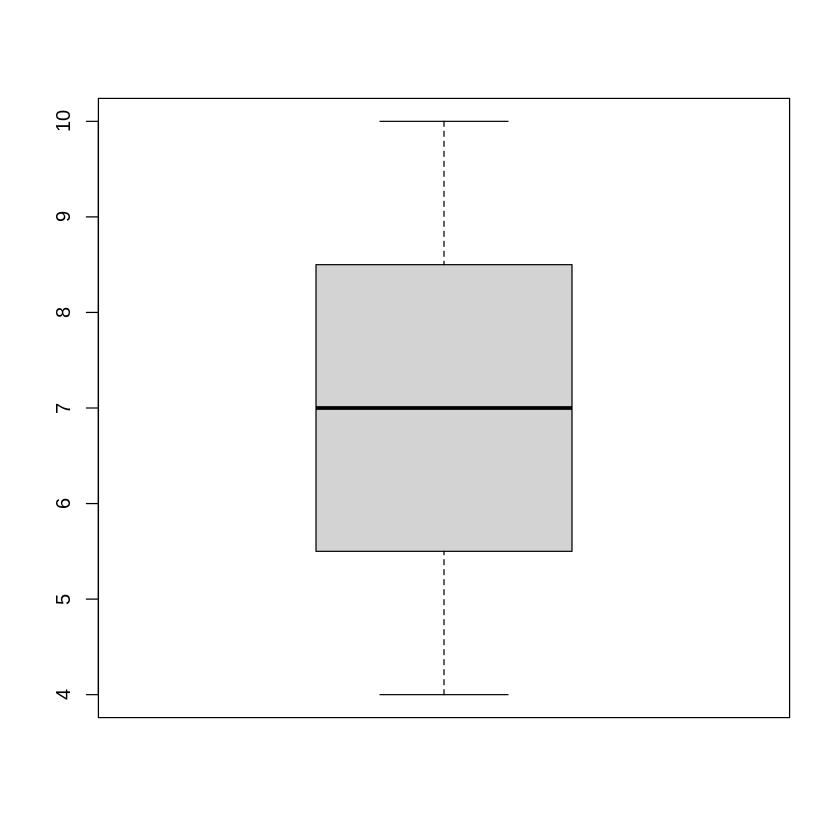

In [ ]:
# e. Rating 

rating <- carrefour$Rating 
boxplot(rating)

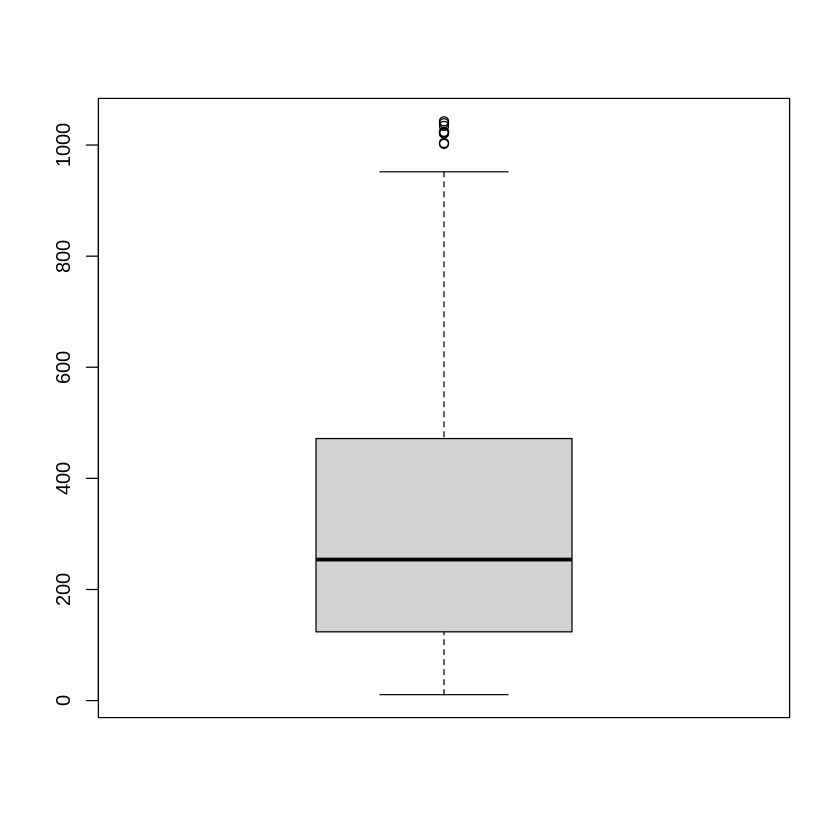

In [ ]:
# e. Total 

total <- carrefour$Total 
boxplot(total)

In [ ]:
# The total and gross income have outliers .
# To see the number of outliers
 
# Gross Income

a <- carrefour$gross_income
boxplot.stats(a)$out

[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

The outlier entries are 9. 

In [ ]:
# Total

a <- carrefour$Total
boxplot.stats(a)$out

# The outlier entries are 9.

[1] 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460 1023.750 1022.385
[9] 1022.490

### Exploratory Data Analysis.
#### Univariate Analysis.

In [ ]:
# a. Unit Price

mean(carrefour$Unit_price, trim = 0, na.rm=FALSE)
median(carrefour$Unit_price,na.rm=FALSE)
range(carrefour$Unit_price,na.rm=FALSE, finite=FALSE)
quantile(carrefour$Unit_price, probs=seq(0, 1,0.25), na.rm=FALSE, names=TRUE, type=7)
var(carrefour$Unit_price)
sd(carrefour$Unit_price,na.rm=FALSE)

[1] 55.67213

[1] 55.23

[1] 10.08 99.96

0%    25%    50%    75%   100% 
10.080 32.875 55.230 77.935 99.960

[1] 701.9653

[1] 26.49463

In [ ]:
# mode

getmode <- function(v){
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [ ]:
unit_price_mode <- getmode(carrefour$Unit_price)
unit_price_mode

[1] 83.77

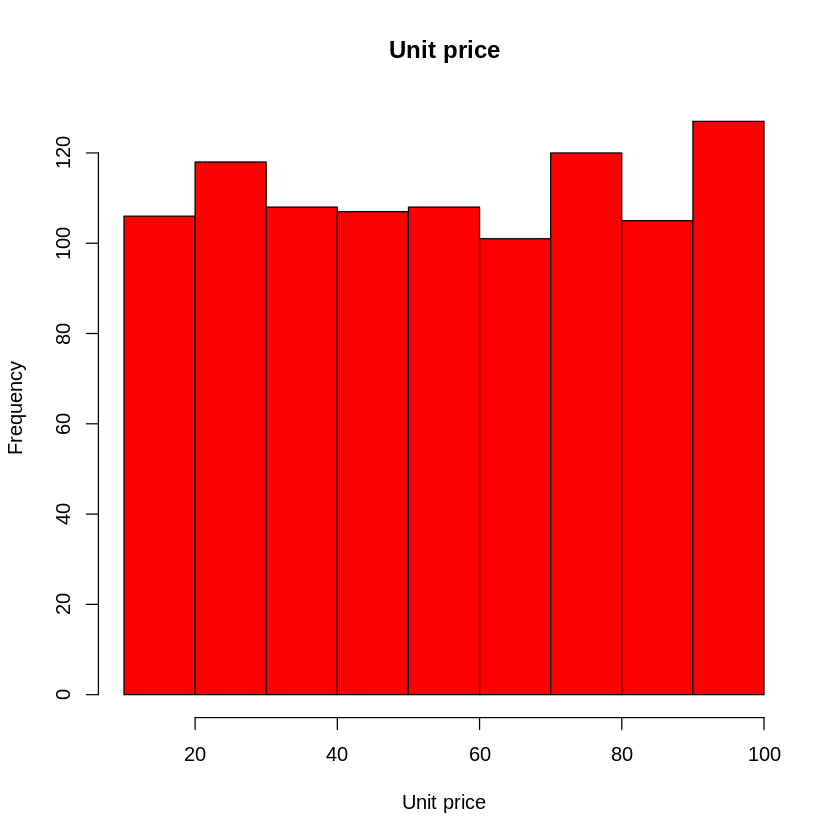

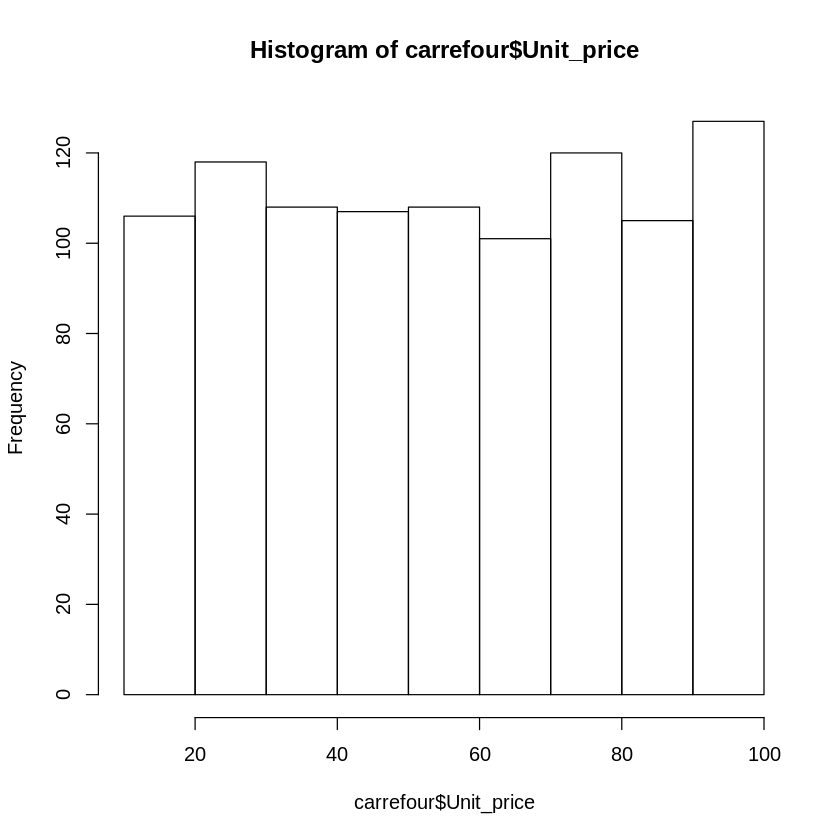

In [ ]:
# Visualizing Unit Price.

d<-hist(carrefour$Unit_price, breaks=10, col="red", xlab="Unit price",main="Unit price")
plot(d)

# The highest unit prices are between 20-30, 70-80 and 90-100.

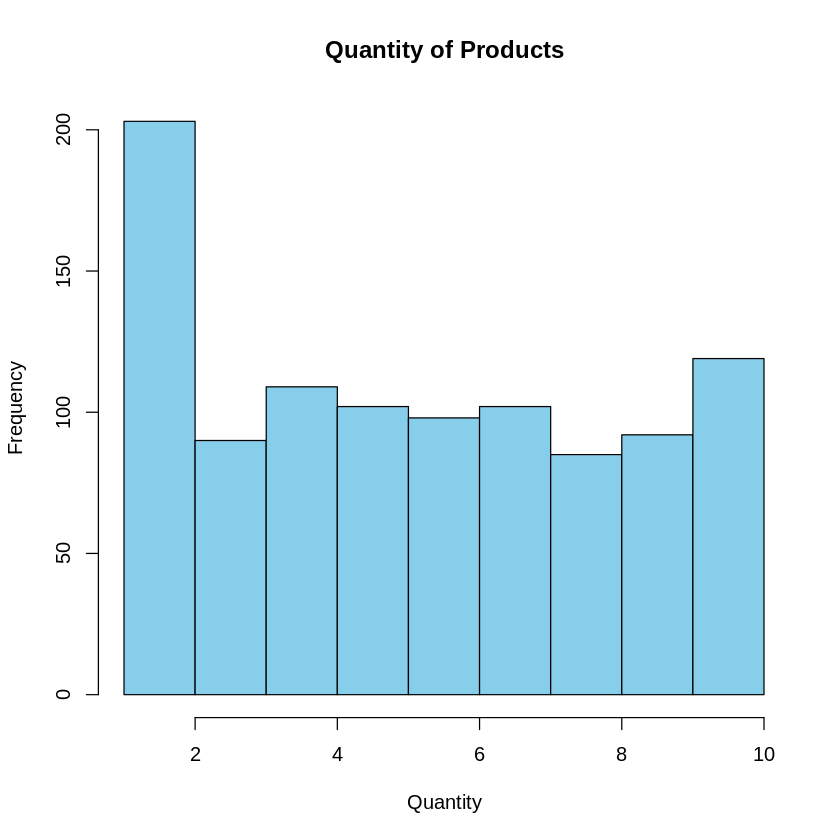

In [ ]:
# b. Quantity

hist(carrefour$Quantity, breaks=12, col="skyblue",xlab="Quantity", main='Quantity of Products')
#
# Most product quantities bought are 1 or 2.

Warning message:
“In density.default(carrefour$Tax, xlab = "Tax") :
 extra argument ‘xlab’ will be disregarded”


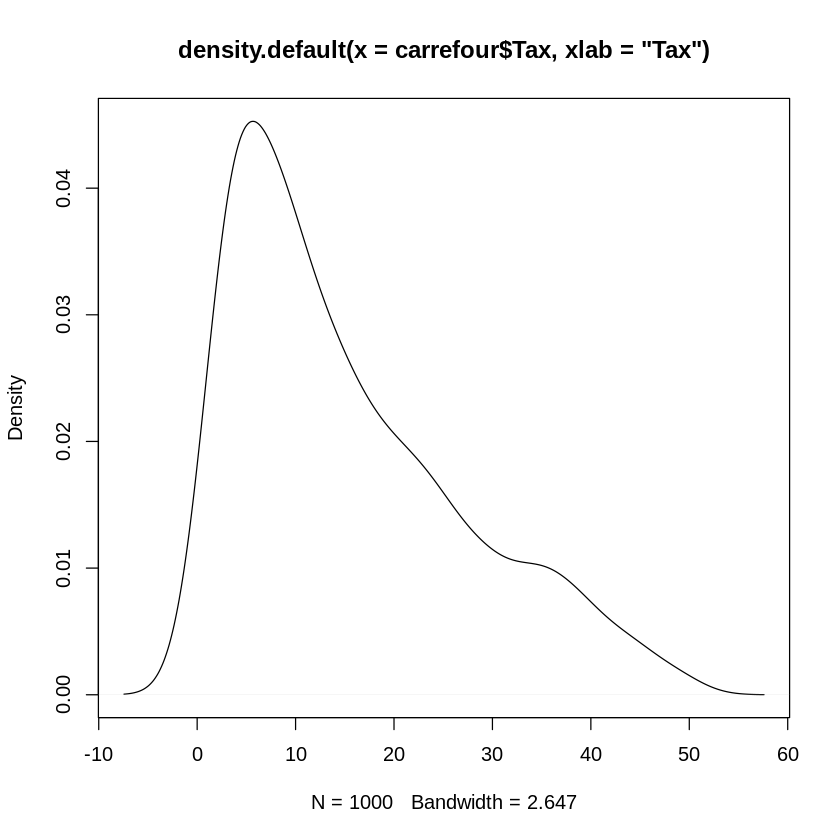

In [ ]:
# c. Tax.

d <- density(carrefour$Tax, xlab="Tax")
plot(d)

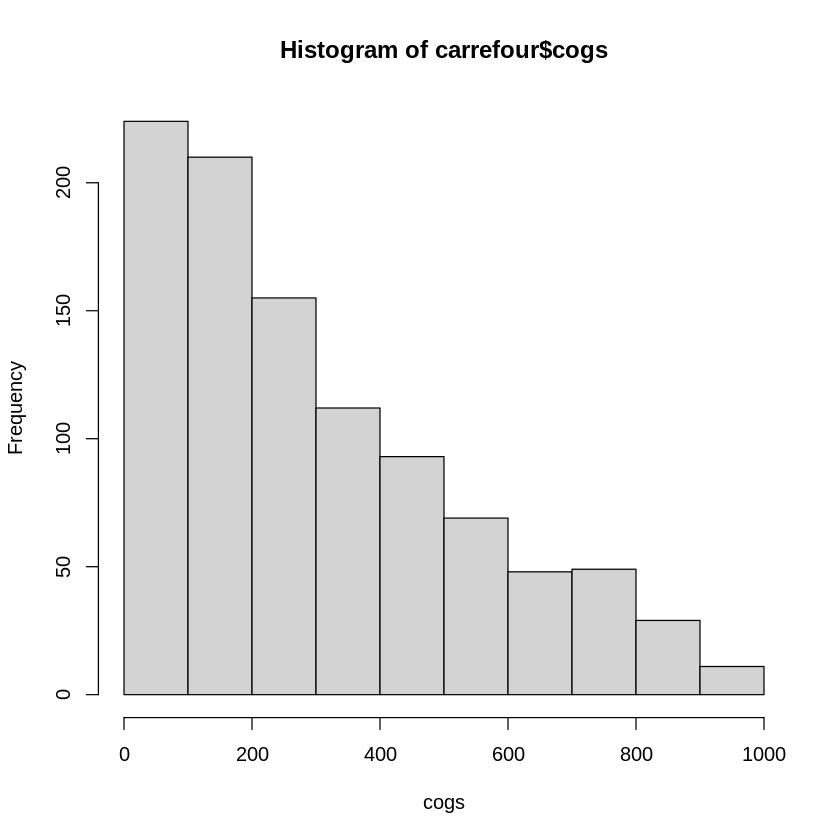

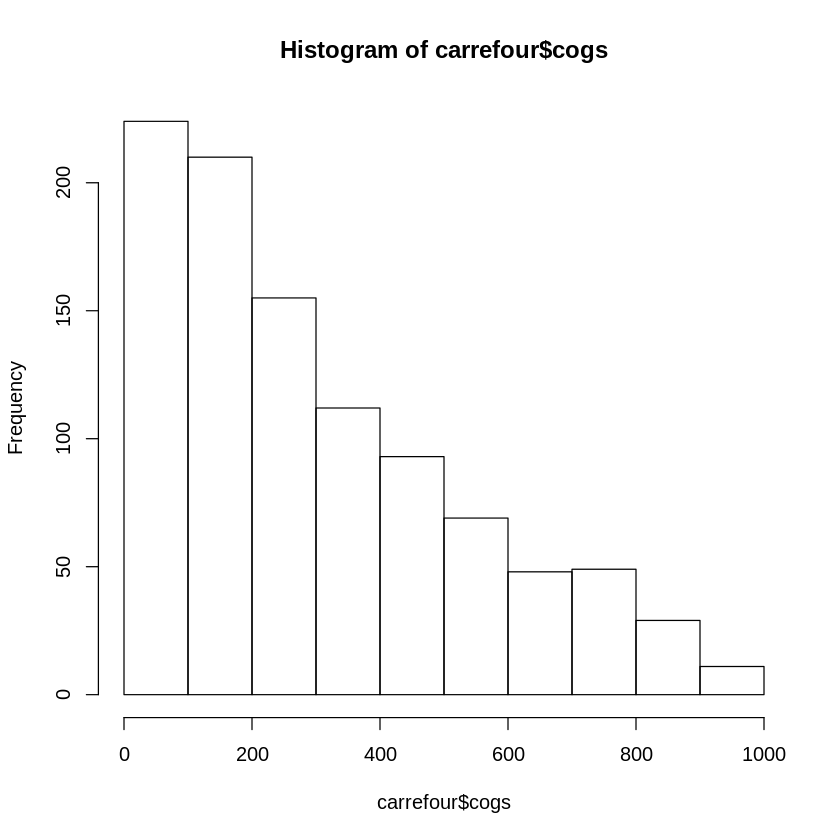

In [ ]:
# d. cogs

cogs <- hist(carrefour$cogs, xlab="cogs")
plot(cogs)

The highest number of cogs is at zero but the occurence reduces as the value of cogs increases.


In [ ]:
# e. gross margin percentage 
#plot(gross_margin)

# The gross margin percentage  range between 2 to 8.


### Bivariate Analysis.
Covariance 
Covariance is the statistical representation of the degree to which two variables vary from each other.

#### Covariance.

In [ ]:
carrefour_cov <- carrefour[,c(6,7,8,12,14,16)]
cov(carrefour_cov)

,Unit_price,Quantity,Tax,cogs,gross_income,Total
Unit_price,701.9653313,0.8347785,196.66834,3933.3668,196.66834,4130.035
Quantity,0.8347785,8.5464464,24.14957,482.9914,24.14957,507.141
Tax,196.6683401,24.1495704,137.09659,2741.9319,137.09659,2879.028
cogs,3933.3668019,482.9914076,2741.93188,54838.6377,2741.93188,57580.570
gross_income,196.6683401,24.1495704,137.09659,2741.9319,137.09659,2879.028
Total,4130.0351420,507.1409780,2879.02848,57580.5695,2879.02848,60459.598


In [ ]:
carrefour.cor <- cor(carrefour_cov, method=c('spearman'))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



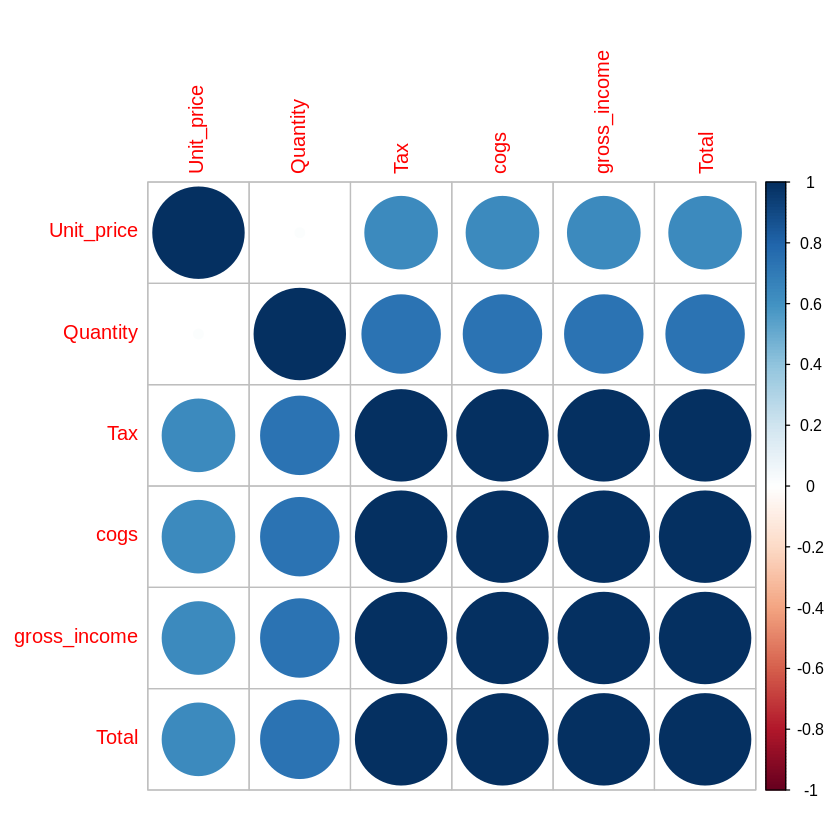

In [ ]:
# visualizing

install.packages('corrplot')
library(corrplot)
corrplot(carrefour.cor)
# cogs,gross income, tax and total are highly correlated to each other.


### IMPLEMENTATION.
### 1. Feature Selection.

In [ ]:
carrefour_1 <- carrefour
head(carrefour_1)

Invoice_ID,Branch,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,Total
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


### 1. Filter Method.
Applies a metric to assign a score to each feature, then features are then ranked by the score.
It uses a correlation function therefore removes redundancy using correlation.


In [ ]:
carrefour_2 <- carrefour_1[,c(6,7,8,12,14,15,16)] 
head(carrefour_2)

Unit_price,Quantity,Tax,cogs,gross_income,Rating,Total
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,26.1415,522.83,26.1415,9.1,548.9715
15.28,5,3.8200,76.40,3.8200,9.6,80.2200
46.33,7,16.2155,324.31,16.2155,7.4,340.5255
58.22,8,23.2880,465.76,23.2880,8.4,489.0480
86.31,7,30.2085,604.17,30.2085,5.3,634.3785
85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [ ]:
# Libraries
library(caret)
library(corrplot)

In [ ]:
# Calculating the correlation matrix

correlationMatrix <- cor(carrefour_2)
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)
head(highlyCorrelated)
head(carrefour_2)

[1] 4 7 3

Unit_price,Quantity,Tax,cogs,gross_income,Rating,Total
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74.69,7,26.1415,522.83,26.1415,9.1,548.9715
15.28,5,3.8200,76.40,3.8200,9.6,80.2200
46.33,7,16.2155,324.31,16.2155,7.4,340.5255
58.22,8,23.2880,465.76,23.2880,8.4,489.0480
86.31,7,30.2085,604.17,30.2085,5.3,634.3785
85.39,7,29.8865,597.73,29.8865,4.1,627.6165


Variables that are highly correlated are at index 4,7 and 3 they include; tax, cogs and total.

We will remove these variables then compare the results graphically.

Unit_price,Quantity,gross_income,Rating
<dbl>,<int>,<dbl>,<dbl>
74.69,7,26.1415,9.1
15.28,5,3.8200,9.6
46.33,7,16.2155,7.4
58.22,8,23.2880,8.4
86.31,7,30.2085,5.3
85.39,7,29.8865,4.1


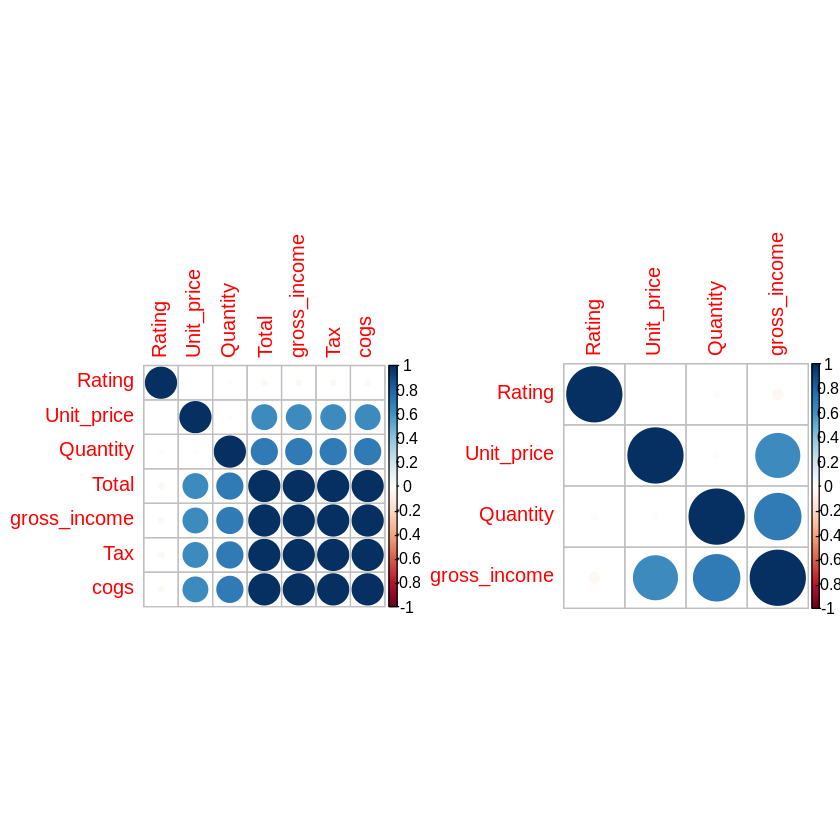

In [ ]:
# Removing Redundant Features 
carrefour_22 <-carrefour_2[,-c(3,4,7)]
head(carrefour_22)
correlationmatrix <- cor(carrefour_22)
# Performing our graphical comparison
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(correlationmatrix, order = "hclust")

### Conclusion.
Important features for this research are unit price, quantity, gross income and rating.




### Follow up questions.
#### Did we have enough data for the study?
yes



#### Was the data relevant?
yes